In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("Transformed_Housing_Data2.csv")
data


,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,0,...,0,0,0,1,0,0,0,0,0,0
21605,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,0,...,0,1,0,0,0,0,0,0,0,0
21606,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,0,...,0,0,0,1,0,0,0,0,0,0
21607,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,0,...,0,0,0,0,1,0,0,0,0,0


In [4]:
data["Mean_Sale"]=data["Sale_Price"].mean()
data["Mean_Sale"].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: Mean_Sale, dtype: float64

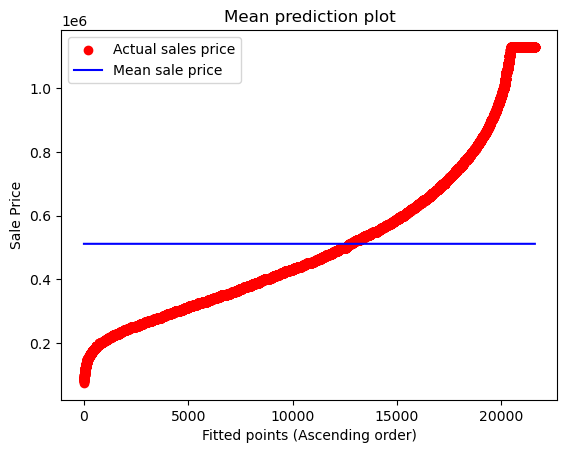

In [8]:
plt.figure(dpi=100)
k= range(0,len(data))
plt.scatter(k,data["Sale_Price"].sort_values(),color="red", label="Actual sales price" )
plt.plot(k,data["Mean_Sale"].sort_values(),color="blue", label="Mean sale price")
plt.xlabel("Fitted points (Ascending order)")
plt.ylabel("Sale Price")
plt.title("Mean prediction plot")
plt.legend()

In [10]:
grades_mean=data.pivot_table(values="Sale_Price",columns="Overall Grade", aggfunc=np.mean)
grades_mean

C:\Users\Kshitij\AppData\Local\Temp\ipykernel_26828\3825482586.py:1: FutureWarning: The provided callable <function mean at 0x000001B6E8FD1E40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grades_mean=data.pivot_table(values="Sale_Price",columns="Overall Grade", aggfunc=np.mean)


Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [11]:
data["Grade_Mean"]=0
for i in grades_mean.columns:
    data["Grade_Mean"][data["Overall Grade"]==i]=grades_mean[i][0]
    
data["Grade_Mean"].head()

C:\Users\Kshitij\AppData\Local\Temp\ipykernel_26828\853672332.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data["Grade_Mean"][data["Overall Grade"]==i]=grades_mean[i][0]
C:\Users\Kshitij\AppData\Local\Temp\ipykernel_26828\853672332.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Grade_Mean"][data["Overall Grade"]==i]=grades_mean[i][0]
C:\Users\Kshitij\AppData\Local\Temp\ipykernel_26828\853672332.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by p

0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: Grade_Mean, dtype: float64

In [12]:
gradewise_list=[]
for i in range(1,11):
    k=data["Sale_Price"][data["Overall Grade"]==i]
    gradewise_list.append(k)
    
classwise_list=[]
for i in range(1,11):
    k=data["Sale_Price"][data["Overall Grade"]==i]
    classwise_list.append(k)
    
    

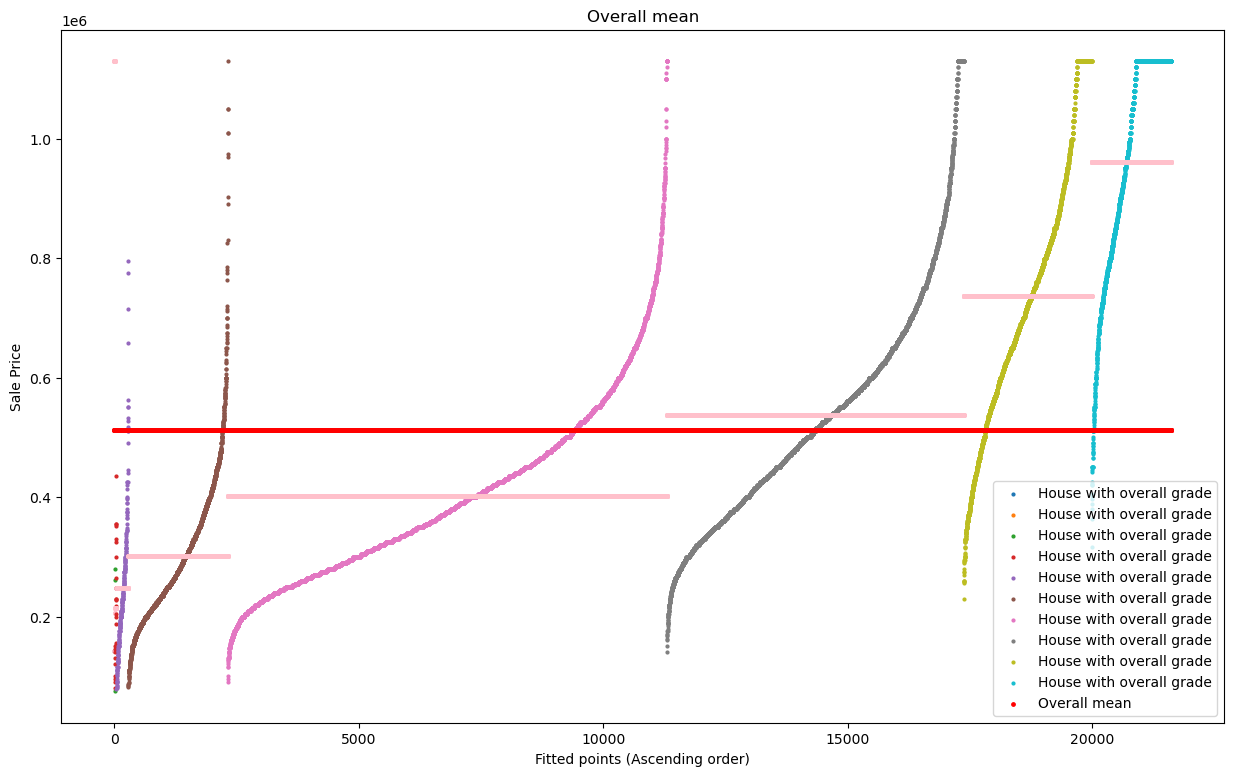

In [18]:
plt.figure(dpi = 100, figsize = (15,9))

##Plotting Sale Price gradewise
#z variable is for x-axis
z=0
for i in range (1,11):
    points=[k for k in range(z,z+len(classwise_list[i-1]))]
    #plotting
    plt.scatter(points,classwise_list[i-1].sort_values(),label=("House with overall grade"), s=4)
    #plotting gradewise mean
    plt.scatter(points,[classwise_list[i-1].mean() for q in range(len(classwise_list[i-1]))], s=6, color="pink")
    z=max(points)+1
    
    
#plotting overall mean
plt.scatter([q for q in range(0, z)], data["Mean_Sale"], color="red", label="Overall mean", s=6)
plt.xlabel("Fitted points (Ascending order)")
plt.ylabel("Sale Price")
plt.title("Overall mean")
plt.legend(loc=4)


#NOT MUCH USEFUL

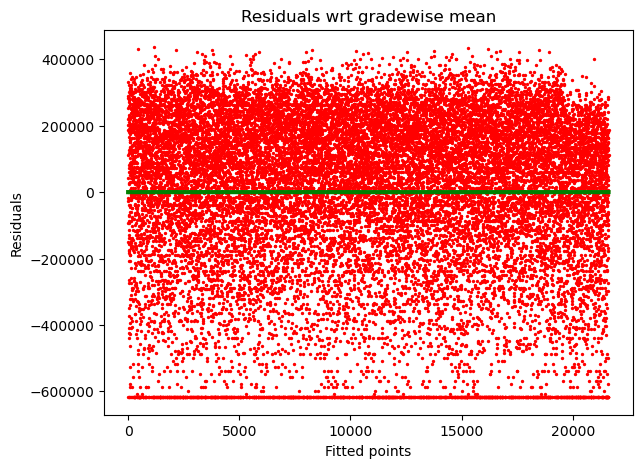

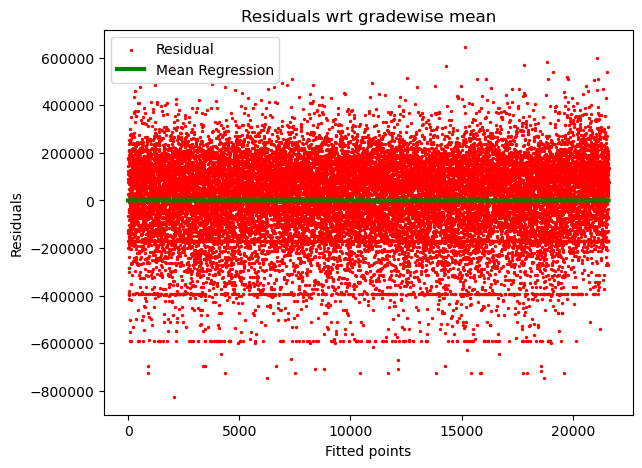

In [26]:
#RESIDUAL IS MOST USEFUL
mean_difference= data["Mean_Sale"]-data["Sale_Price"]
grade_mean_difference= data["Grade_Mean"]-data["Sale_Price"]

#plotting
k=range(0,len(data))
l=[0 for i in range(len(data))]

plt.figure(dpi = 100, figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(k,mean_difference,color="red", label="Residual", s=2 )
plt.plot(k,l,color="green", label="Mean Regression", linewidth=3)
plt.xlabel("Fitted points")
plt.ylabel("Residuals")
plt.title("Residuals wrt gradewise mean")

plt.figure(dpi = 100, figsize = (15,5))
plt.subplot(1,2,2)
plt.scatter(k,grade_mean_difference,color="red", label="Residual", s=2 )
plt.plot(k,l,color="green", label="Mean Regression", linewidth=3)
plt.xlabel("Fitted points")
plt.ylabel("Residuals")
plt.legend()
plt.title("Residuals wrt gradewise mean")

plt.legend()


#HENCE TO CONCLUDE THAT MEAN WITH A CATEGORICAL VARIABLE WILL GIVE BETTER RESULTS

In [28]:
mean_error=sum(mean_difference)/len(data)
print(round(mean_error,7))

0.0


In [29]:
#MEAN ABSOLUTE ERROR WITHOUT SKLEARN LIBRARY
Y = data["Sale_Price"]
Y_hat1 = data["Mean_Sale"]
Y_hat2 = data["Grade_Mean"]
n=len(data)

len(Y),len(Y_hat1),len(Y_hat2),n

(21609, 21609, 21609, 21609)

In [30]:
cost_mean = sum(abs(Y_hat1-Y))/n
cost_mean

199168.78146839526

In [32]:
cost_grade_mean = sum(abs(Y_hat2-Y))/n
cost_grade_mean

137081.70298203363

In [34]:
##MEAN ABSOLUTE ERROR WITH SKLEARN LIBRARY
from sklearn.metrics import mean_absolute_error
cost_mean = mean_absolute_error(Y_hat1,Y)
cost_mean

199168.7814684109

In [36]:
#MEAN SQUARE ERROR
from sklearn.metrics import mean_squared_error
cost_squared_mean = mean_squared_error(Y_hat1,Y)
cost_grade_squared_mean = mean_squared_error(Y_hat2,Y)

cost_squared_mean,cost_grade_squared_mean

(62528116847.799576, 30804835720.342426)

In [37]:
from sklearn.metrics import mean_squared_error
cost_squared_mean = mean_squared_error(Y_hat1,Y)**0.5
cost_grade_squared_mean = mean_squared_error(Y_hat2,Y)**0.5

cost_squared_mean,cost_grade_squared_mean

(250056.2273725643, 175513.06424406826)

In [38]:
##LINEAR REGRESSION
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9,Mean_Sale,Grade_Mean
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,511618.558147,402239.619779
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1,0,0,0,0,0,0,0,511618.558147,402239.619779
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,1,0,0,0,0,0,0,0,511618.558147,301882.014720
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,1,0,0,0,0,0,0,511618.558147,402239.619779
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,1,0,0,0,0,0,511618.558147,537584.082097


In [72]:
sale_price = data["Sale_Price"].head(30)
flat_area = data["Flat Area (in Sqft)"].head(30)
sample_data = pd.DataFrame({"sale_price" : sale_price, "flat_area" : flat_area})
sample_data

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


<function matplotlib.pyplot.show(close=None, block=None)>

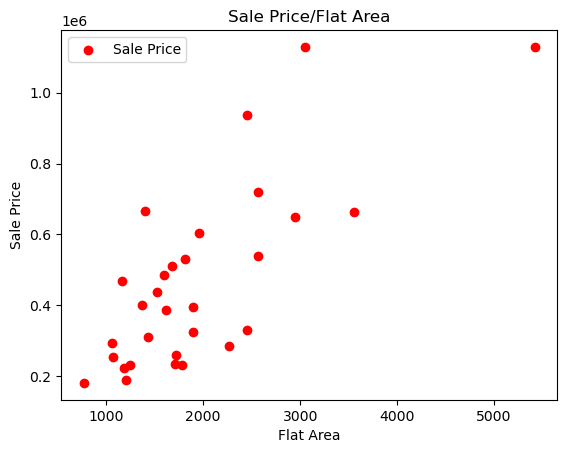

In [73]:
plt.figure( dpi = 100)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color = "red", label="Sale Price" )
plt.xlabel("Flat Area")
plt.ylabel("Sale Price")
plt.title("Sale Price/Flat Area")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

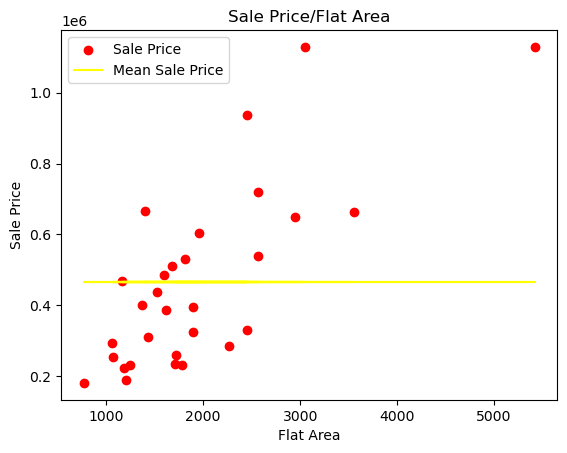

In [74]:
sample_data["mean_sale_price"] = sample_data["sale_price"].mean()

plt.figure( dpi = 100)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color = "red", label="Sale Price" )
plt.plot(sample_data.flat_area, sample_data.mean_sale_price, color = "yellow", label = "Mean Sale Price")
plt.xlabel("Flat Area")
plt.ylabel("Sale Price")
plt.title("Sale Price/Flat Area")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

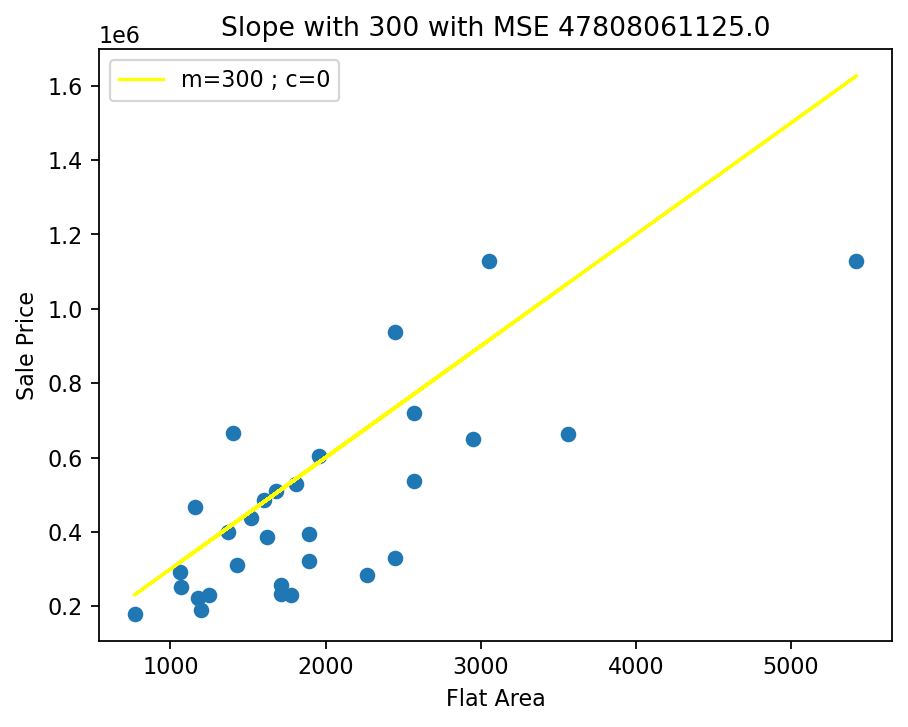

In [75]:
c = 0
m = 300

line = []
for i in range (len(sample_data)):
    line.append(sample_data.flat_area[i] * m + c)
    

plt.figure( dpi = 160)
plt.scatter(sample_data.flat_area, sample_data.sale_price )
plt.plot(sample_data.flat_area, line, color = "yellow", label = "m=300 ; c=0")
plt.xlabel("Flat Area")
plt.ylabel("Sale Price")
MSE = mean_squared_error(sample_data.sale_price, line)
plt.title("Slope with "+ str(m) + " with MSE " + str(MSE))
plt.legend()
plt.show    

In [81]:
#FOR FINDING SLOPE
def slope_error(slope, intercept, sample_data):
    sale = []
    for i in range(len(sample_data)):
        tmp = sample_data.iloc[i]['flat_area'] * slope + intercept
        sale.append(tmp)
    MSE = mean_squared_error(sample_data.sale_price, sale)
    return MSE

slope = [i/10 for i in range(0,5000)]
Cost = []
for i in slope:
    cost = slope_error(slope = i , intercept = 0, sample_data = sample_data)
    Cost.append(cost)

In [84]:
#Arranging data frame
Cost_table = pd.DataFrame({"slope": slope, "Cost": Cost})
Cost_table.tail()

,slope,Cost
4995,499.5,3.526038e+11
4996,499.6,3.528488e+11
4997,499.7,3.530938e+11
4998,499.8,3.533389e+11
4999,499.9,3.535842e+11


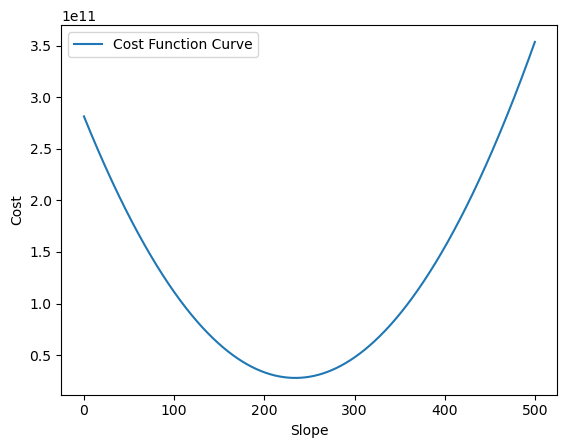

In [85]:
#plotting the above cost function 
plt.plot(Cost_table.slope, Cost_table.Cost, label = "Cost Function Curve")
plt.xlabel("Value of Slope")
plt.ylabel("Cost")
plt.legend()

In [87]:
new_slope = Cost_table["slope"][Cost_table["Cost"] == Cost_table["Cost"].min()]
new_slope

2343    234.3
Name: slope, dtype: float64

In [92]:
#FOR FINDING INTERCEPT
def intercept_error(slope, intercept, sample_data):
    sale = []
    for i in range(len(sample_data)):
        tmp = sample_data.iloc[i]['flat_area'] * slope + intercept
        sale.append(tmp)
    MSE = mean_squared_error(sample_data.sale_price, sale)
    return MSE

intercept = [i for i in range(5000,50000)]
Cost = []
for i in intercept:
    cost = intercept_error(slope = 234 , intercept = i, sample_data = sample_data)
    Cost.append(cost)

In [94]:
#Arranging data frame
Cost_table = pd.DataFrame({"intercept": intercept, "Cost": Cost})
Cost_table.head()

,intercept,Cost
0,5000,2.779911e+10
1,5001,2.779909e+10
2,5002,2.779908e+10
3,5003,2.779907e+10
4,5004,2.779906e+10


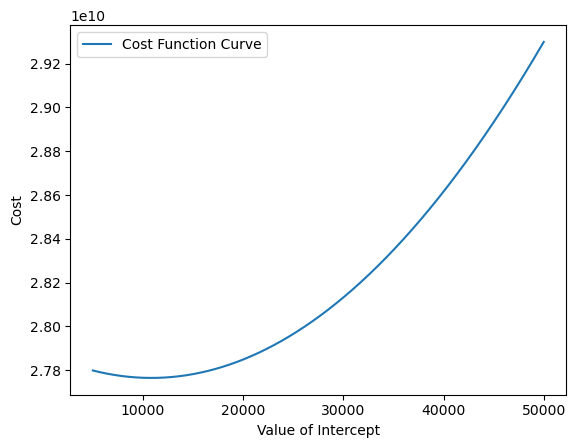

In [95]:
#plotting the above cost function 
plt.plot(Cost_table.intercept, Cost_table.Cost, label = "Cost Function Curve")
plt.xlabel("Value of Intercept")
plt.ylabel("Cost")
plt.legend()

In [96]:
new_slope = Cost_table["intercept"][Cost_table["Cost"] == Cost_table["Cost"].min()]
new_slope

5834    10834
Name: intercept, dtype: int64

2177    217.7
Name: slope, dtype: float64

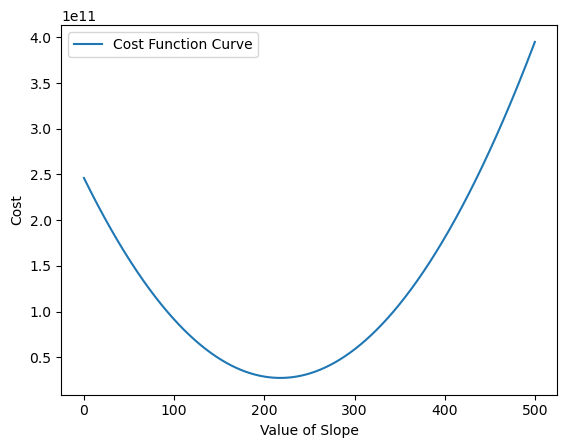

In [112]:
#FOR FINDING SLOPE Using intercept 39428
def slope_error(slope, intercept, sample_data):
    sale = []
    for i in range(len(sample_data)):
        tmp = sample_data.iloc[i]['flat_area'] * slope + intercept
        sale.append(tmp)
    MSE = mean_squared_error(sample_data.sale_price, sale)
    return MSE

slope = [i/10 for i in range(0,5000)]
Cost = []
for i in slope:
    cost = slope_error(slope = i , intercept = 39428, sample_data = sample_data)
    Cost.append(cost)
    
#Arranging data frame
Cost_table = pd.DataFrame({"slope": slope, "Cost": Cost})
Cost_table.tail()

#plotting the above cost function 
plt.plot(Cost_table.slope, Cost_table.Cost, label = "Cost Function Curve")
plt.xlabel("Value of Slope")
plt.ylabel("Cost")
plt.legend()

new_slope = Cost_table["slope"][Cost_table["Cost"] == Cost_table["Cost"].min()]
new_slope


35012    40012
Name: intercept, dtype: int64

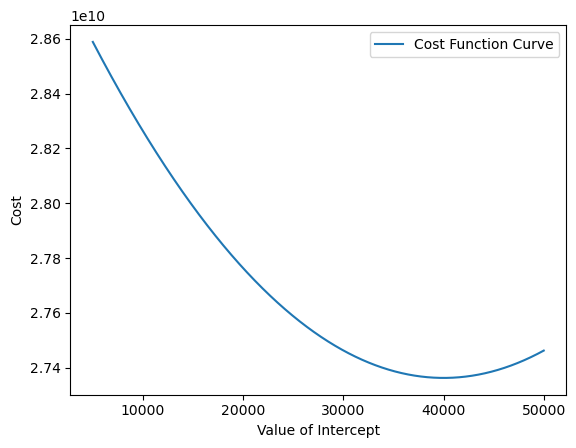

In [113]:
#FOR FINDING INTERCEPT with slope 219
def intercept_error(slope, intercept, sample_data):
    sale = []
    for i in range(len(sample_data)):
        tmp = sample_data.iloc[i]['flat_area'] * slope + intercept
        sale.append(tmp)
    MSE = mean_squared_error(sample_data.sale_price, sale)
    return MSE

intercept = [i for i in range(5000,50000)]
Cost = []
for i in intercept:
    cost = intercept_error(slope = 219 , intercept = i, sample_data = sample_data)
    Cost.append(cost)
    
    
#Arranging data frame
Cost_table = pd.DataFrame({"intercept": intercept, "Cost": Cost})
Cost_table.head()

#plotting the above cost function 
plt.plot(Cost_table.intercept, Cost_table.Cost, label = "Cost Function Curve")
plt.xlabel("Value of Intercept")
plt.ylabel("Cost")
plt.legend()


new_slope = Cost_table["intercept"][Cost_table["Cost"] == Cost_table["Cost"].min()]
new_slope



In [120]:
#Gradient Descent Algorithm

#Step 1 : Initializing parameters
#This function will take only target variable as its parameter
def param_init(Y):
    # Y = target variable returns the value of m and c
    m = 0.1
    c = Y.mean()
    return m , c


#Step 2 : Generate predictions
def generate_predictions(m,c,X):
    # X = independent variable , returns prediction by line with parameters m and c 
    prediction = []
    for x in X:
        pred= (m * x) + c
        prediction.append(pred)
    return prediction


#Step 3 : Calculating the cost
def compute_cost(prediction, Y):
    #returns mean squared error between prediction and Y 
    cost = np.sum(((prediction - Y)**2) / len(Y))
    return cost


#Step 4 : Updating the parameters
# (I) Calculating the gradient
def gradients(prediction, Y, X):
    # returns gradients corresponding to m and c 
    n = len(Y)
    Gm = 2/n * np.sum((prediction - Y) * X)
    Gc = 2/n * np.sum((prediction - Y))
    return Gm, Gc


# (II) Using the gradient to update the parameters m and c 
def param_update(m_old, c_old, Gm_old, Gc_old, alpha):
    #updates and returns new values of m and c 
    m_new = m_old - alpha * Gm_old
    c_new = c_old - alpha * Gc_old
    return m_new, c_new





#Step 5 : Defining the results
def results(m, c, X, Y, cost, predictions, i):
    #print and plot the final result obtained from the gradient descent
    #if the gradient descent converged to the optimum value before max_iter
    if i < max_iter - 1:
        print("***** Gradient Descent has coverged at iteration {} *****".format(i))
    else:
        print("***** Result after", max_iter, "iteration is : ******")
    #Plotting the final results:
    plt.figure(figsize = (14,7), dpi = 120)
    plt.scatter(X, Y, color = "red", label = "Data points")
    label = "Final Regression Line : m = {}; c = {}". format(str(m), str(c))
    plt.plot(X, predictions, color = "green", label = label) 
    plt.xlabel("Flat Area")
    plt.ylabel("Sale Price")
    plt.title("Final Regression Line")
    plt.legend()              

After iteration 0 : m = 0.16581732068166516 ; c = 1.1879386363489176e-16 ; Cost =  0.85836535863667
After iteration 20 : m = 0.6861565598533277 ; c = 1.6801375105994037e-16 ; Cost =  0.4315763482676267
After iteration 40 : m = 0.7494176638040206 ; c = 1.6967908559687811e-16 ; Cost =  0.4252680298646712
After iteration 60 : m = 0.7571087371880522 ; c = 1.6727360237685694e-16 ; Cost =  0.4251747873487998
***** Gradient Descent has coverged at iteration 66 *****


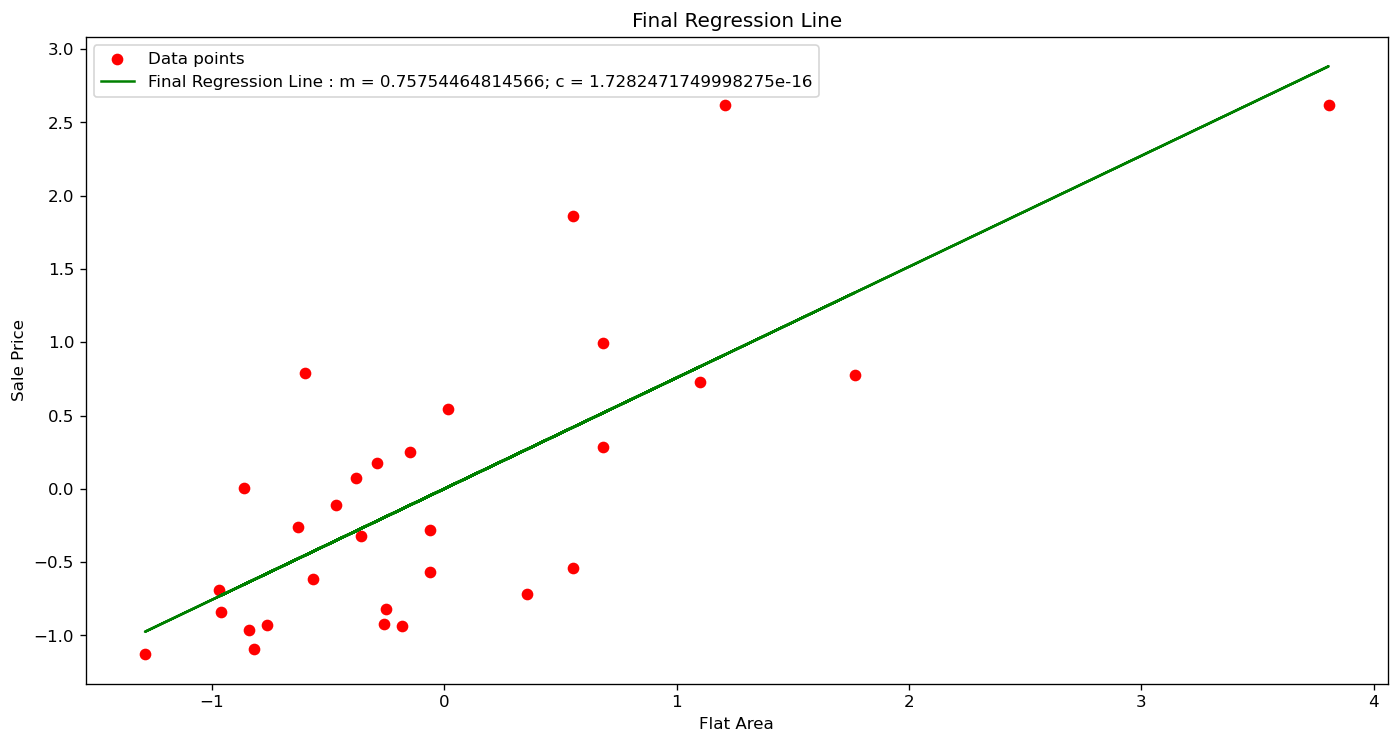

In [122]:
#Using the above functions
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sale_price = scaler.fit_transform(sample_data["sale_price"].values.reshape(-1,1))             
flat_area = scaler.fit_transform(sample_data["flat_area"].values.reshape(-1,1))

#Declaring parameters
max_iter = 2000
cost_old = 0
alpha = 0.05

              
#Step 1 : Initializing the values of m and c
m, c = param_init(sale_price)
              
              
#Gradient Descent in action              
for i in range(0, max_iter):
    
    #Step 2: Initializing the values of m and c 
    predictions = generate_predictions(m, c, flat_area)
    
    #Step 3 : Calculating Cost
    cost_new = compute_cost(predictions, sale_price)
    
    
    #Checking if GD converged
    if abs(cost_new - cost_old) < 10**(-7):
        break
        
        
    #Calculating Gradients
    Gm, Gc = gradients(predictions, sale_price, flat_area)
    
    
    #Step 4 : updating parameters m and c 
    m, c = param_update(m, c, Gm, Gc, alpha)
    
    
    
    #display results after 20 iterations
    if i % 20 == 0:
        print("After iteration", i , ": m =", m, "; c =", c , "; Cost = ", cost_new)
        
        
    #updating cost_old
    cost_old = cost_new
    
    
    
#final results
results(m, c, flat_area, sale_price, cost_new, predictions, i )
    